In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Data Load & Set Up

In [101]:
# Import CSV files
agShare_df = pd.read_csv('Data_to_Test/agriculture-share-gdp.csv')
emissions_df = pd.read_csv('Data_to_Test/co2_emissions_kt_by_country.csv')
pesticide_df = pd.read_csv('Data_to_Test/pesticide-use-tonnes.csv')
population_df = pd.read_csv('Data_to_Test/population.csv')
gdp_df = pd.read_csv('Data_to_Test/national-gdp-penn-world-table.csv')
#crop_yield_df = pd.read_csv('https://catalog.ourworldindata.org/explorers/agriculture/latest/crop_yields/crop_yields.csv')

In [102]:
# Merge the dataframes
df = pd.merge(emissions_df, pesticide_df, how = "left", left_on = ['country_code','year'], right_on = ['Code','Year']).dropna()
df = df.drop(columns = ["Entity", "Code", "Year"])
df = df.rename(columns = {
    "country_name": "country",
    "value": "co2_emissions",
    "Pesticides (total) | 00001357 || Agricultural Use | 005157 || Tonnes": "pesticide_by_tonnes"
})
df = pd.merge(df, agShare_df, how = "left", left_on = ['country_code','year'], right_on = ['Code','Year']).dropna()
df = df.drop(columns = ["Entity", "Code", "Year"])
df = df.rename(columns = {
    "Agriculture, forestry, and fishing, value added (% of GDP)": "ag_percent_gdp"
})
df = pd.merge(df, population_df, how = "left", left_on = ['country_code','year'], right_on = ['Code','Year']).dropna()
df = df.drop(columns = ["Entity", "Code", "Year"])
df = df.rename(columns = {
    "Population (historical)": "population"
})
df = pd.merge(df, gdp_df, how = "left", left_on = ['country_code','year'], right_on = ['Code','Year']).dropna()
df = df.drop(columns = ["Entity", "Code", "Year"])
df = df.rename(columns = {
    "GDP (output, multiple price benchmarks)": "gdp"
})
#df = pd.merge(df, crop_yield_df, on = ['country', 'year'])

# Print information about the merged dataframe and the head of the datafram
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4597 entries, 0 to 5086
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   country_code         4597 non-null   object 
 1   country              4597 non-null   object 
 2   year                 4597 non-null   int64  
 3   co2_emissions        4597 non-null   float64
 4   pesticide_by_tonnes  4597 non-null   float64
 5   ag_percent_gdp       4597 non-null   float64
 6   population           4597 non-null   int64  
 7   gdp                  4597 non-null   float64
dtypes: float64(4), int64(2), object(2)
memory usage: 323.2+ KB


,country_code,country,year,co2_emissions,pesticide_by_tonnes,ag_percent_gdp,population,gdp
0,ABW,Aruba,1995,707.731,231.75,0.505922,75931,4.184156e+09
1,ABW,Aruba,1996,726.066,252.64,0.485830,78495,3.977093e+09
2,ABW,Aruba,1997,759.069,273.52,0.429978,81121,4.282010e+09
3,ABW,Aruba,1998,806.740,294.41,0.407917,83787,4.660577e+09
4,ABW,Aruba,1999,810.407,315.30,0.383268,86482,4.854151e+09


In [103]:
df["ag_gdp"] = df["ag_percent_gdp"] * df["gdp"]
df.head()

,country_code,country,year,co2_emissions,pesticide_by_tonnes,ag_percent_gdp,population,gdp,ag_gdp
0,ABW,Aruba,1995,707.731,231.75,0.505922,75931,4.184156e+09,2.116857e+09
1,ABW,Aruba,1996,726.066,252.64,0.485830,78495,3.977093e+09,1.932191e+09
2,ABW,Aruba,1997,759.069,273.52,0.429978,81121,4.282010e+09,1.841171e+09
3,ABW,Aruba,1998,806.740,294.41,0.407917,83787,4.660577e+09,1.901128e+09
4,ABW,Aruba,1999,810.407,315.30,0.383268,86482,4.854151e+09,1.860443e+09


## Data Exploration

In [105]:
summary = df.describe().loc[['min', '25%', '50%', '75%', 'max']]
summary

,year,co2_emissions,pesticide_by_tonnes,ag_percent_gdp,population,gdp,ag_gdp
min,1990.0,0.000000e+00,0.07,0.012520,3.586800e+04,3.610216e+08,4.909238e+07
25%,1998.0,2.270000e+03,273.52,3.083317,2.547852e+06,1.486498e+10,1.355307e+11
50%,2006.0,1.102000e+04,1476.70,8.340969,8.481411e+06,4.996435e+10,4.839120e+11
75%,2013.0,6.614000e+04,7808.10,18.919125,2.609509e+07,2.895297e+11,1.772043e+12
max,2019.0,1.070722e+07,620538.00,79.042366,1.423520e+09,2.059584e+13,1.536579e+14


In [107]:
cumulative = df[["country","co2_emissions","pesticide_by_tonnes","ag_percent_gdp","gdp","ag_gdp"]].groupby('country').sum()
cumulative.head()

,co2_emissions,pesticide_by_tonnes,ag_percent_gdp,gdp,ag_gdp
country,,,,,
Albania,9.423000e+04,10063.18,511.745810,6.001048e+11,1.220698e+13
Algeria,2.475930e+06,96528.61,201.713975,9.384938e+12,9.016616e+13
Angola,5.124900e+05,1296.00,178.525136,3.226321e+12,2.362492e+13
Antigua and Barbuda,1.144000e+04,9321.64,44.261775,3.370876e+10,5.485064e+10
Argentina,4.374320e+06,3858613.95,189.197937,1.889823e+13,1.165785e+14


In [128]:
corr_matrix = df[["year","co2_emissions","pesticide_by_tonnes","population","ag_percent_gdp","gdp","ag_gdp"]].corr().round(2)
corr_matrix

,year,co2_emissions,pesticide_by_tonnes,population,ag_percent_gdp,gdp,ag_gdp
year,1.00,0.05,0.07,0.02,-0.20,0.10,0.06
co2_emissions,0.05,1.00,0.70,0.72,-0.11,0.93,0.76
pesticide_by_tonnes,0.07,0.70,1.00,0.52,-0.13,0.77,0.52
population,0.02,0.72,0.52,1.00,0.03,0.64,0.96
ag_percent_gdp,-0.20,-0.11,-0.13,0.03,1.00,-0.15,0.02
gdp,0.10,0.93,0.77,0.64,-0.15,1.00,0.66
ag_gdp,0.06,0.76,0.52,0.96,0.02,0.66,1.00


In [109]:
c_summary = cumulative.describe().loc[['min', '25%', '50%', '75%', 'max']]
c_summary

,co2_emissions,pesticide_by_tonnes,ag_percent_gdp,gdp,ag_gdp
min,7.150650e+02,2.942000e+01,0.076461,1.200541e+09,9.179452e+07
25%,5.943000e+04,8.081717e+03,82.206934,4.776162e+11,3.212785e+12
50%,2.999000e+05,3.920812e+04,224.208305,1.473261e+12,1.347481e+13
75%,1.679505e+06,2.116855e+05,511.717472,7.399764e+12,4.545692e+13
max,1.807228e+08,9.557800e+06,1516.441087,3.787195e+14,3.202645e+15


#### Sample Exploration

In [110]:
sample_countries = ["Brazil", "China", "France", "United States", "United Kingdom"]
sample = df[df["country"].isin(sample_countries)].reset_index(drop=True)
sample.head()

,country_code,country,year,co2_emissions,pesticide_by_tonnes,ag_percent_gdp,population,gdp,ag_gdp
0,BRA,Brazil,1990,197900.0,51120.0,6.963440,149143224,9.545720e+11,6.647105e+12
1,BRA,Brazil,1991,205480.0,58662.0,6.841389,151724253,1.041851e+12,7.127709e+12
2,BRA,Brazil,1992,207870.0,67358.0,6.806085,154275077,1.071128e+12,7.290192e+12
3,BRA,Brazil,1993,215260.0,76053.0,6.778109,156794574,1.155152e+12,7.829748e+12
4,BRA,Brazil,1994,222500.0,84748.0,8.721990,159265011,1.300093e+12,1.133940e+13


In [111]:
sample_int_df = sample[["year", "co2_emissions", "pesticide_by_tonnes", "ag_percent_gdp", "population", "gdp", "ag_gdp"]]
sample_int_df.head()

,year,co2_emissions,pesticide_by_tonnes,ag_percent_gdp,population,gdp,ag_gdp
0,1990,197900.0,51120.0,6.963440,149143224,9.545720e+11,6.647105e+12
1,1991,205480.0,58662.0,6.841389,151724253,1.041851e+12,7.127709e+12
2,1992,207870.0,67358.0,6.806085,154275077,1.071128e+12,7.290192e+12
3,1993,215260.0,76053.0,6.778109,156794574,1.155152e+12,7.829748e+12
4,1994,222500.0,84748.0,8.721990,159265011,1.300093e+12,1.133940e+13


In [112]:
matrix = sample_int_df.corr().round(2)
print(matrix)

                     year  co2_emissions  pesticide_by_tonnes  ag_percent_gdp  \
year                 1.00           0.27                 0.37           -0.30   
co2_emissions        0.27           1.00                 0.59            0.28   
pesticide_by_tonnes  0.37           0.59                 1.00            0.14   
ag_percent_gdp      -0.30           0.28                 0.14            1.00   
population           0.04           0.75                 0.36            0.80   
gdp                  0.41           0.90                 0.68            0.00   
ag_gdp               0.14           0.81                 0.35            0.68   

                     population   gdp  ag_gdp  
year                       0.04  0.41    0.14  
co2_emissions              0.75  0.90    0.81  
pesticide_by_tonnes        0.36  0.68    0.35  
ag_percent_gdp             0.80  0.00    0.68  
population                 1.00  0.47    0.97  
gdp                        0.47  1.00    0.52  
ag_gdp         

### CO2 Exploration

In [113]:
test = sample.groupby(['year', 'country', 'co2_emissions'])
#test.head()
countries = sample.country.unique()
countries

array(['Brazil', 'China', 'France', 'United Kingdom', 'United States'],
      dtype=object)

In [114]:
country = "Brazil"
data = sample.loc[sample["country"] == country]
data.head()

,country_code,country,year,co2_emissions,pesticide_by_tonnes,ag_percent_gdp,population,gdp,ag_gdp
0,BRA,Brazil,1990,197900.0,51120.0,6.963440,149143224,9.545720e+11,6.647105e+12
1,BRA,Brazil,1991,205480.0,58662.0,6.841389,151724253,1.041851e+12,7.127709e+12
2,BRA,Brazil,1992,207870.0,67358.0,6.806085,154275077,1.071128e+12,7.290192e+12
3,BRA,Brazil,1993,215260.0,76053.0,6.778109,156794574,1.155152e+12,7.829748e+12
4,BRA,Brazil,1994,222500.0,84748.0,8.721990,159265011,1.300093e+12,1.133940e+13


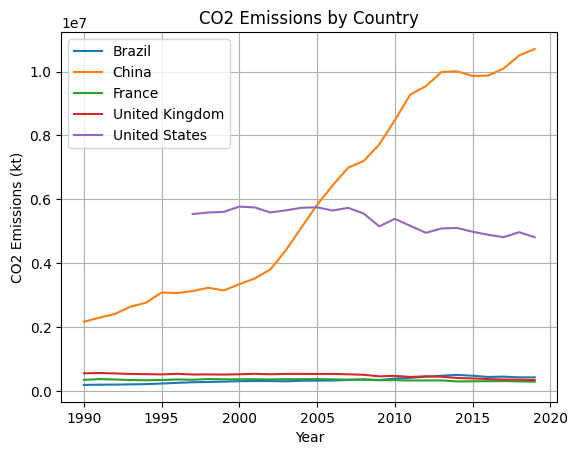

In [115]:
for country in countries:
    data = sample.loc[sample['country'] == country]
    plt.plot(data['year'], data['co2_emissions'])

plt.xlabel('Year')
plt.ylabel('CO2 Emissions (kt)')
plt.title('CO2 Emissions by Country')
plt.legend(countries)
plt.grid(True)
plt.show()

### GDP Exploration
Explore agriculture percent gdp to see where countries land with higher gdp and lower

##### Agricultural GDP Percent

In [104]:
gdp_h = cumulative.loc[cumulative["ag_percent_gdp"] >= c_summary["ag_percent_gdp"]["75%"]]
gdp_l = cumulative.loc[cumulative["ag_percent_gdp"] < c_summary["ag_percent_gdp"]["25%"]]

In [58]:
gdp_h.head()

,co2_emissions,pesticide_by_tonnes,ag_percent_gdp,population
country,,,,
Bangladesh,1.166460e+06,240801.64,605.629864,4236033279
Benin,9.338000e+04,45733.05,860.663122,256771911
Bhutan,1.213000e+04,323.49,626.815912,19549742
Burkina Faso,5.359000e+04,39444.32,791.234208,425888681
Burundi,8.450000e+03,5521.84,1205.247453,242934886


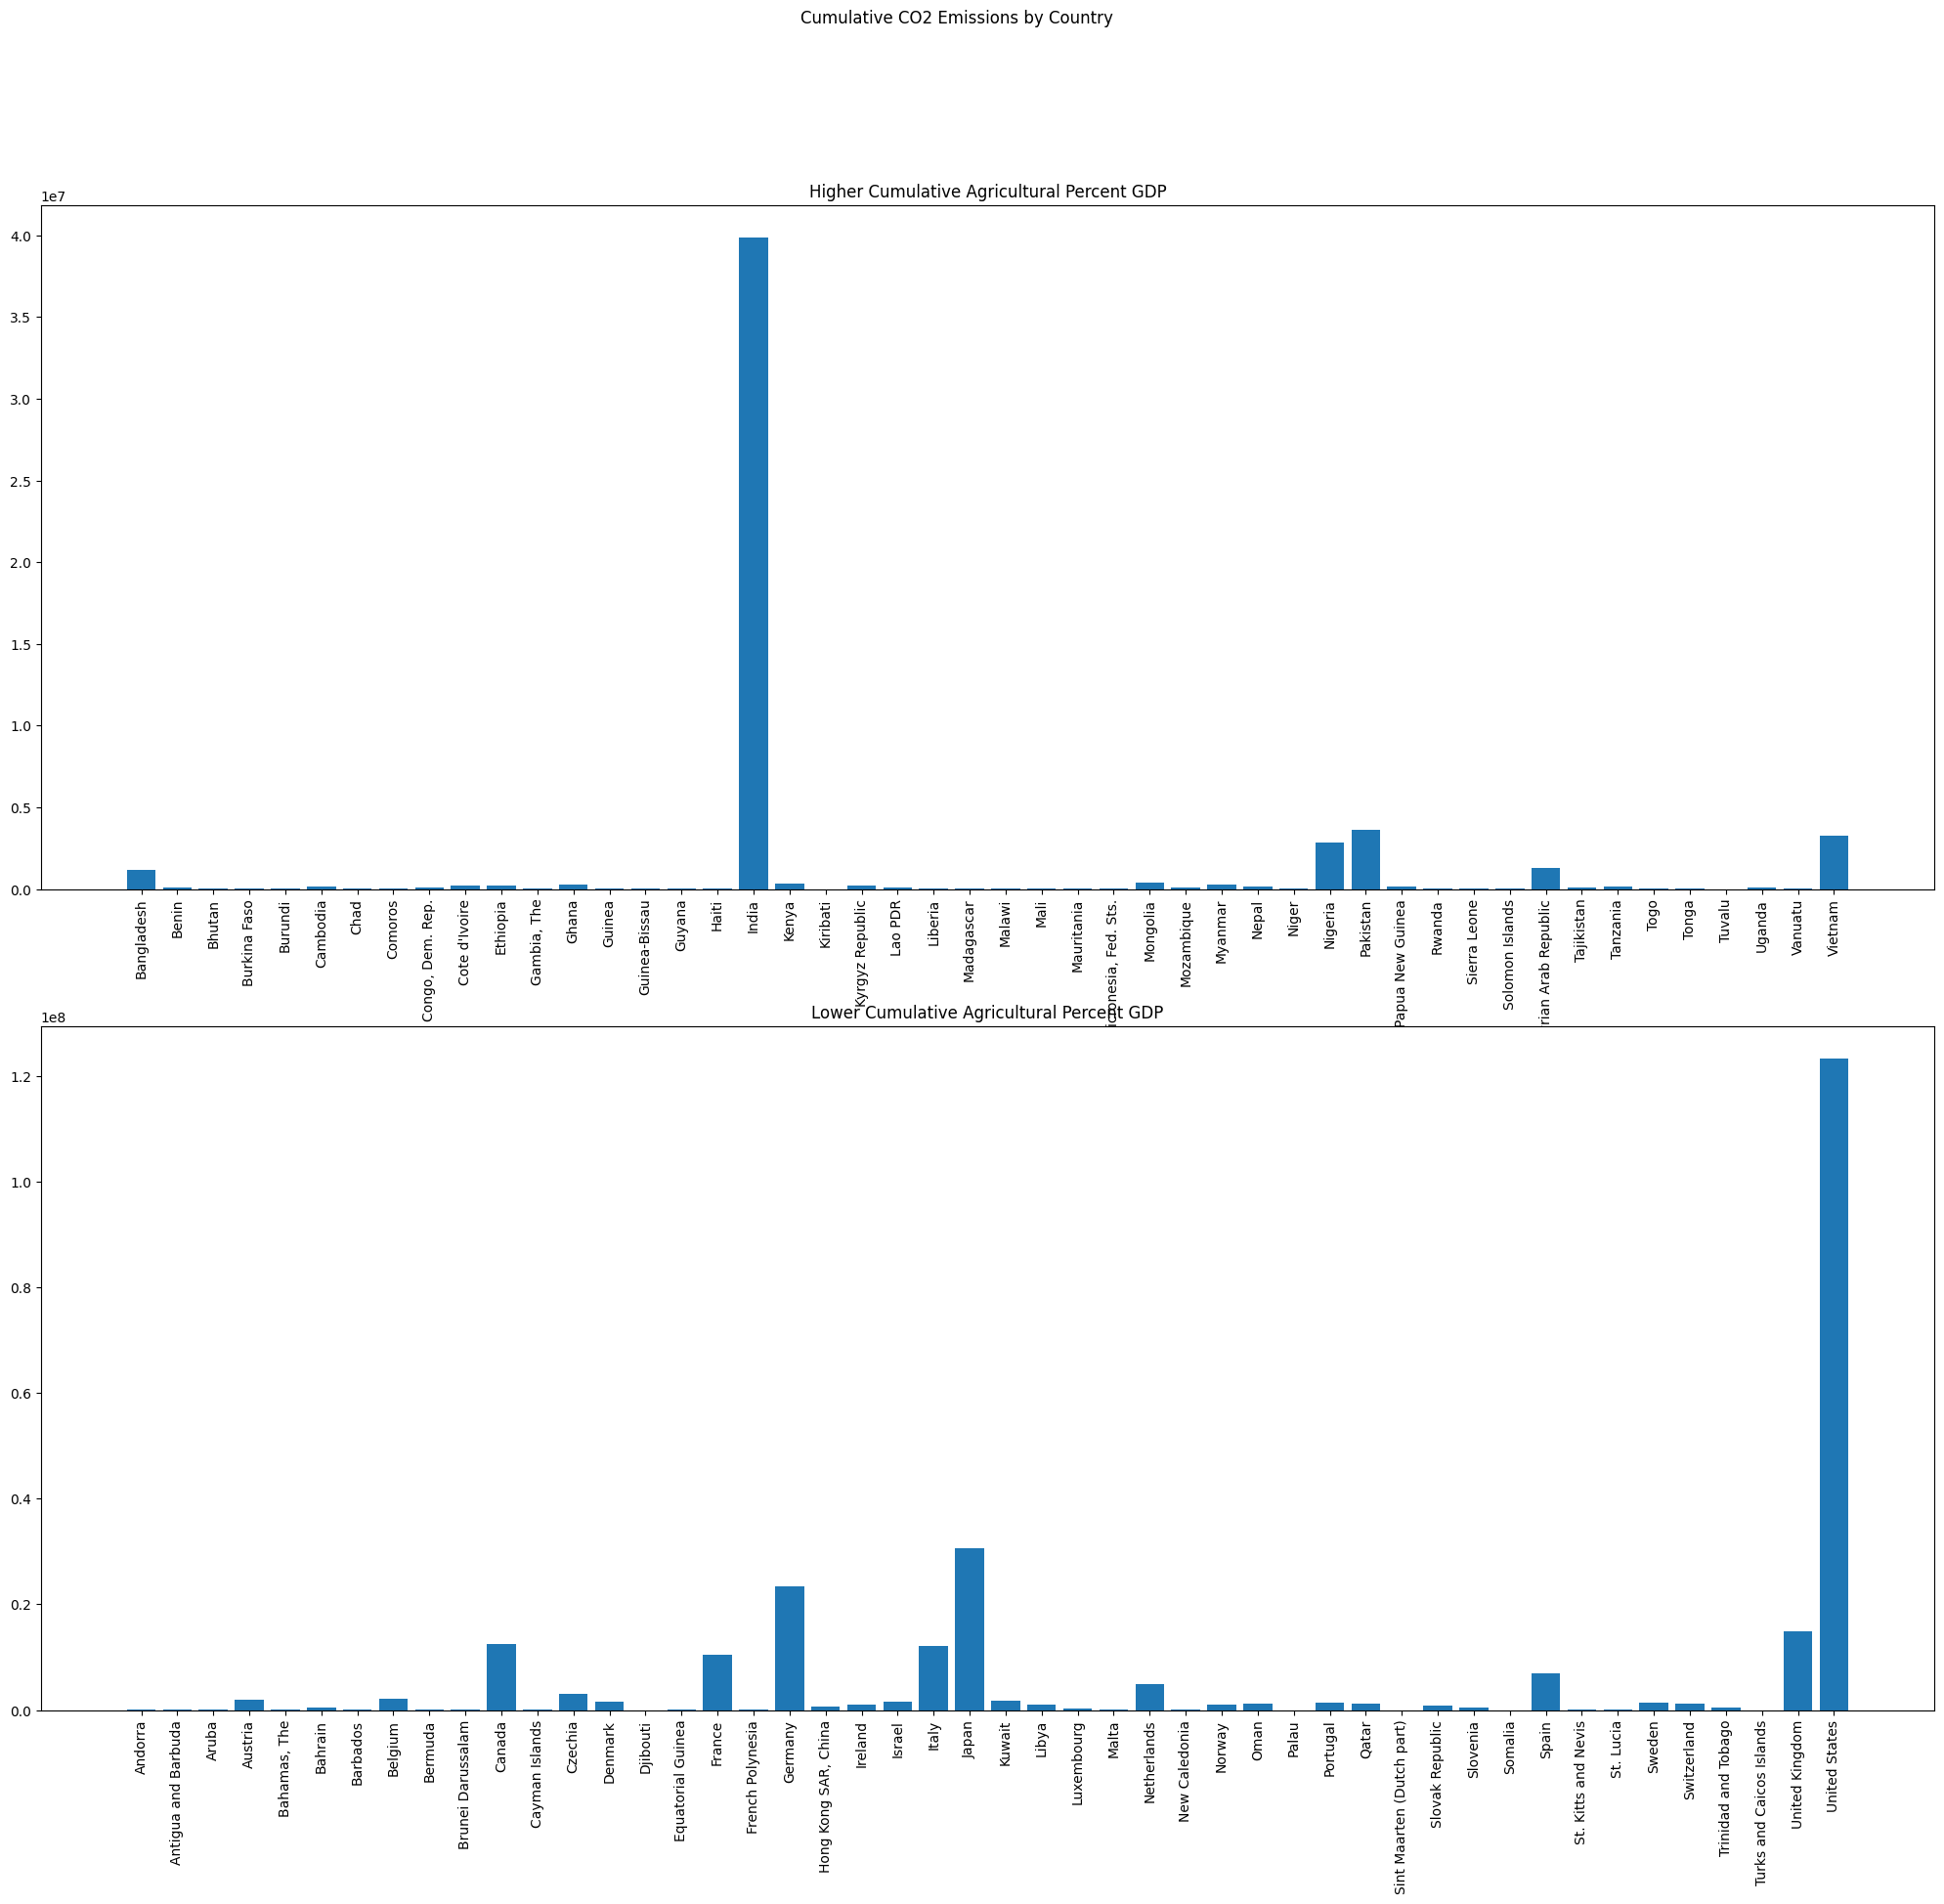

In [119]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(25,20))

fig.suptitle('Cumulative CO2 Emissions by Country')

ax1.bar(gdp_h.index,gdp_h['co2_emissions'])
ax1.set_title('Higher Cumulative Agricultural Percent GDP')
ax1.set_xticks(ax1.get_xticks())
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)

ax2.bar(gdp_l.index,gdp_l['co2_emissions'])
ax2.set_title('Lower Cumulative Agricultural Percent GDP')
ax2.set_xticks(ax2.get_xticks())
ax2.set_xticklabels(ax2.get_xticklabels(),rotation=90)

plt.show()

#### Population Size for GDP Groups

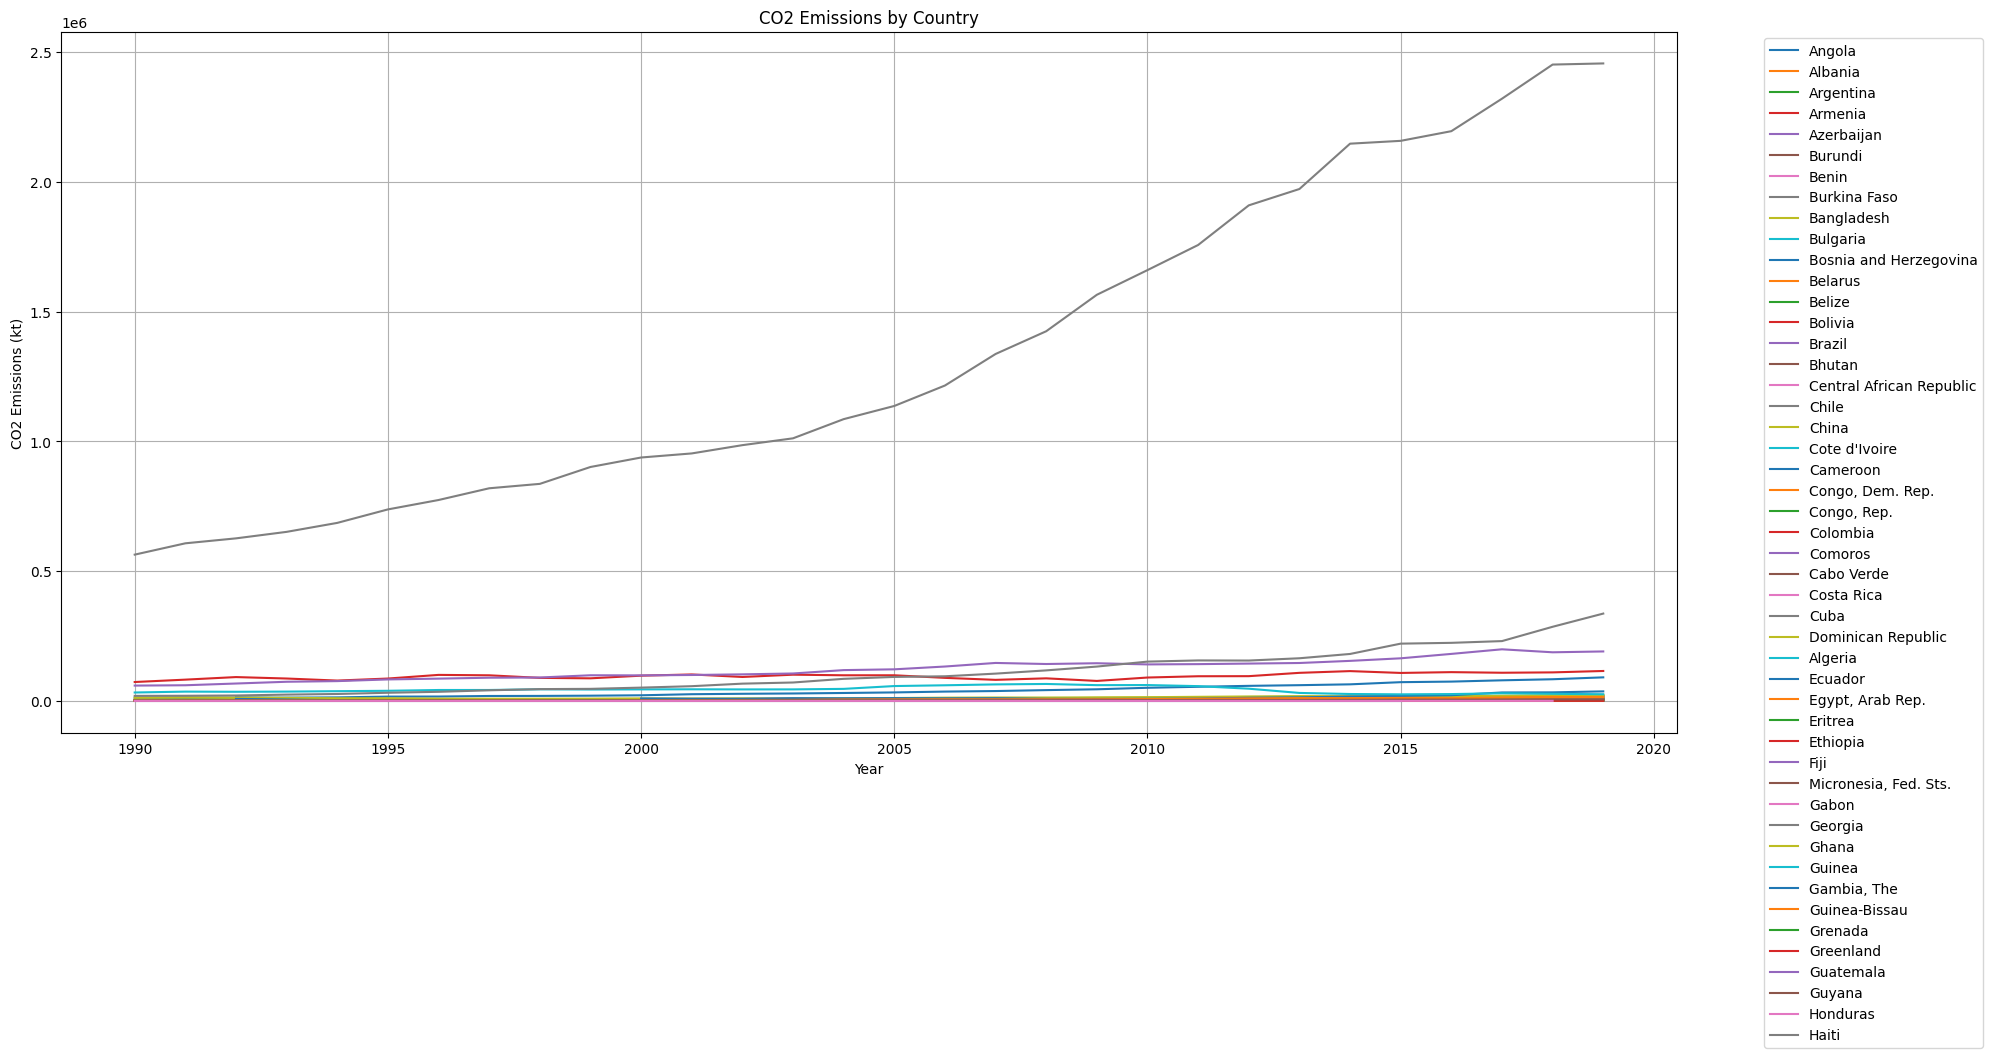

In [98]:
plt.figure(figsize=(20,10))

# Higher ag_percent_gdp country CO2 emissions
for country in gdp_h.index:
    data = df.loc[df['country'] == country]
    plt.plot(data['year'], data['co2_emissions'])

plt.xlabel('Year')
plt.ylabel('CO2 Emissions (kt)')
plt.title('CO2 Emissions by Country')
plt.grid(True)

# Place the legend outside the plot
plt.legend(countries, bbox_to_anchor=(1.05, 1), loc='upper left')
# Adjust layout to make room for the legend
plt.tight_layout()
# Show the plot
plt.show()


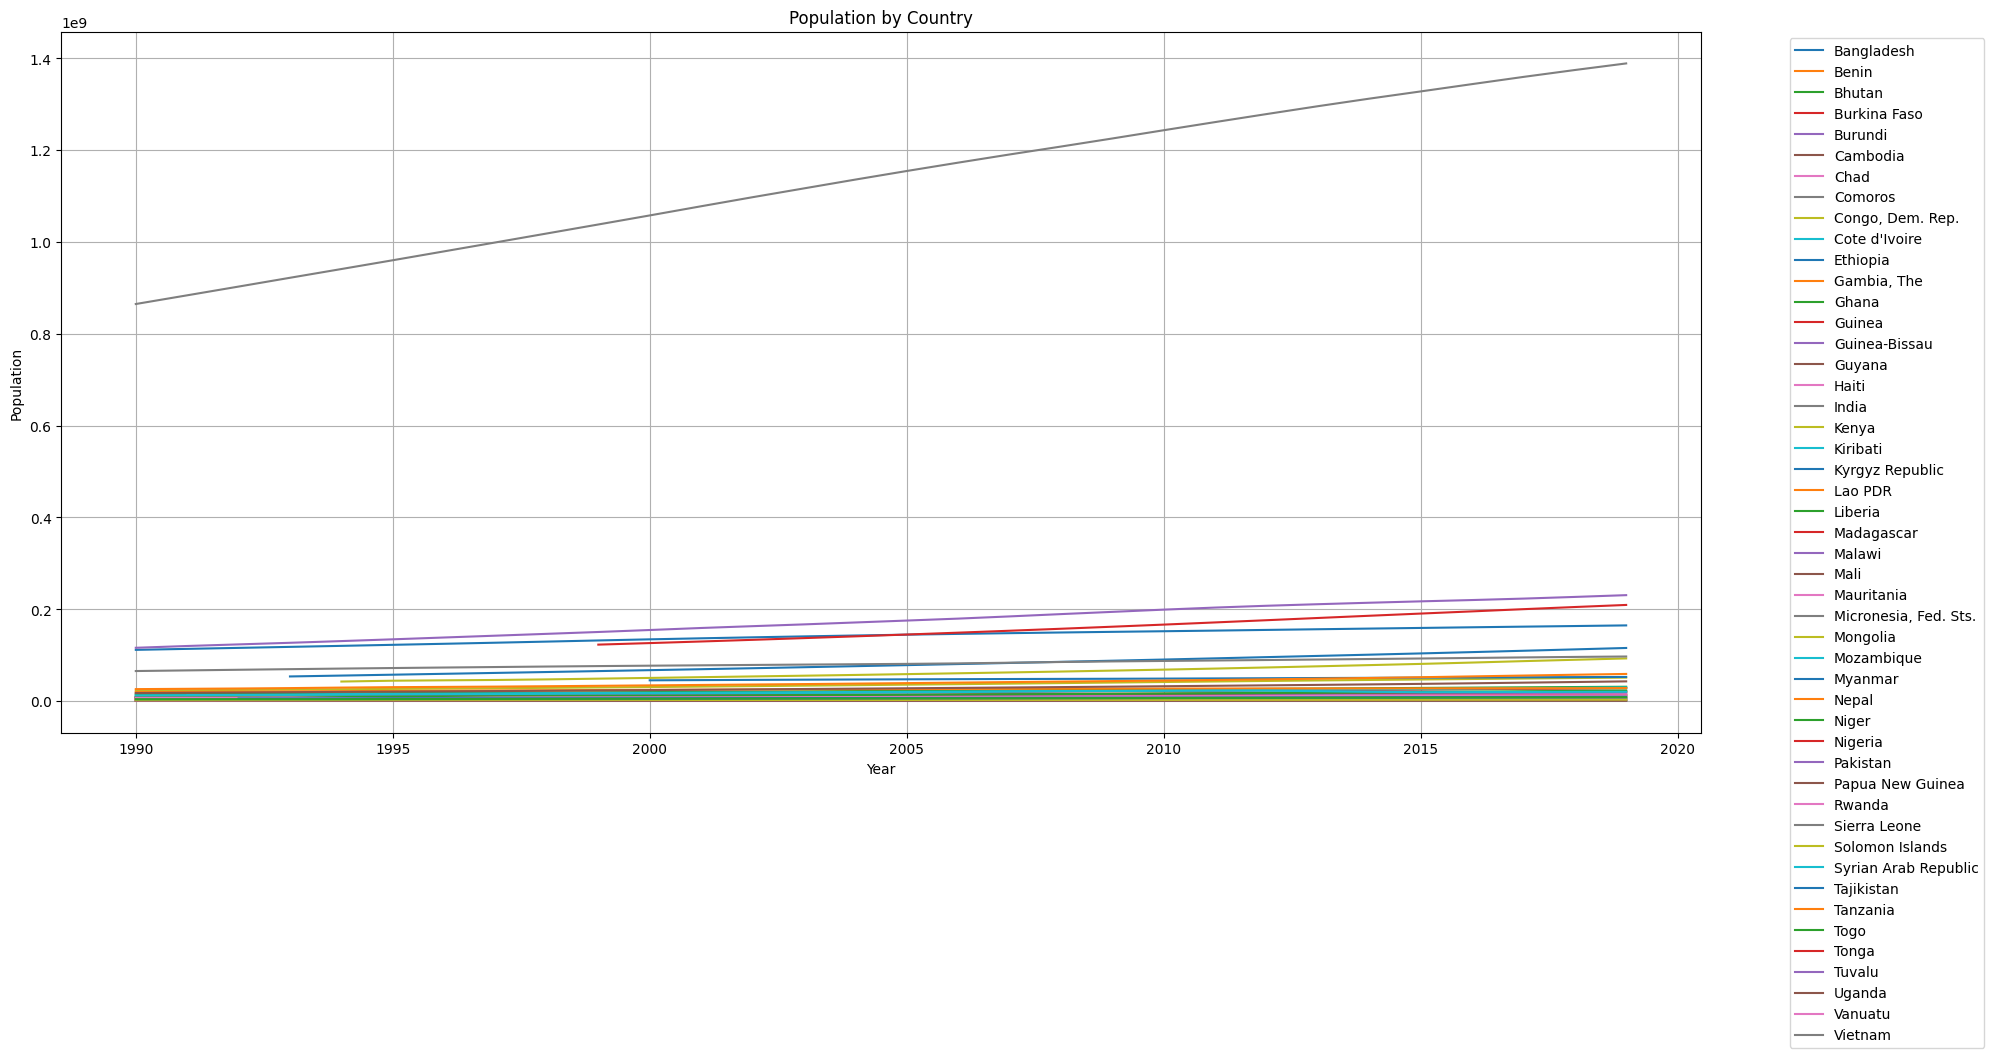

In [121]:
plt.figure(figsize=(20,10))

# Higher ag_percent_gdp country CO2 emissions
for country in gdp_h.index:
    data = df.loc[df['country'] == country]
    plt.plot(data['year'], data['population'])

plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Population by Country')
plt.grid(True)

# Place the legend outside the plot
plt.legend(gdp_h.index, bbox_to_anchor=(1.05, 1), loc='upper left')
# Adjust layout to make room for the legend
plt.tight_layout()
# Show the plot
plt.show()

##### Agricultural GDP

In [116]:
a_gdp_h = cumulative.loc[cumulative["ag_gdp"] >= c_summary["ag_gdp"]["75%"]]
a_gdp_l = cumulative.loc[cumulative["ag_gdp"] < c_summary["ag_gdp"]["25%"]]

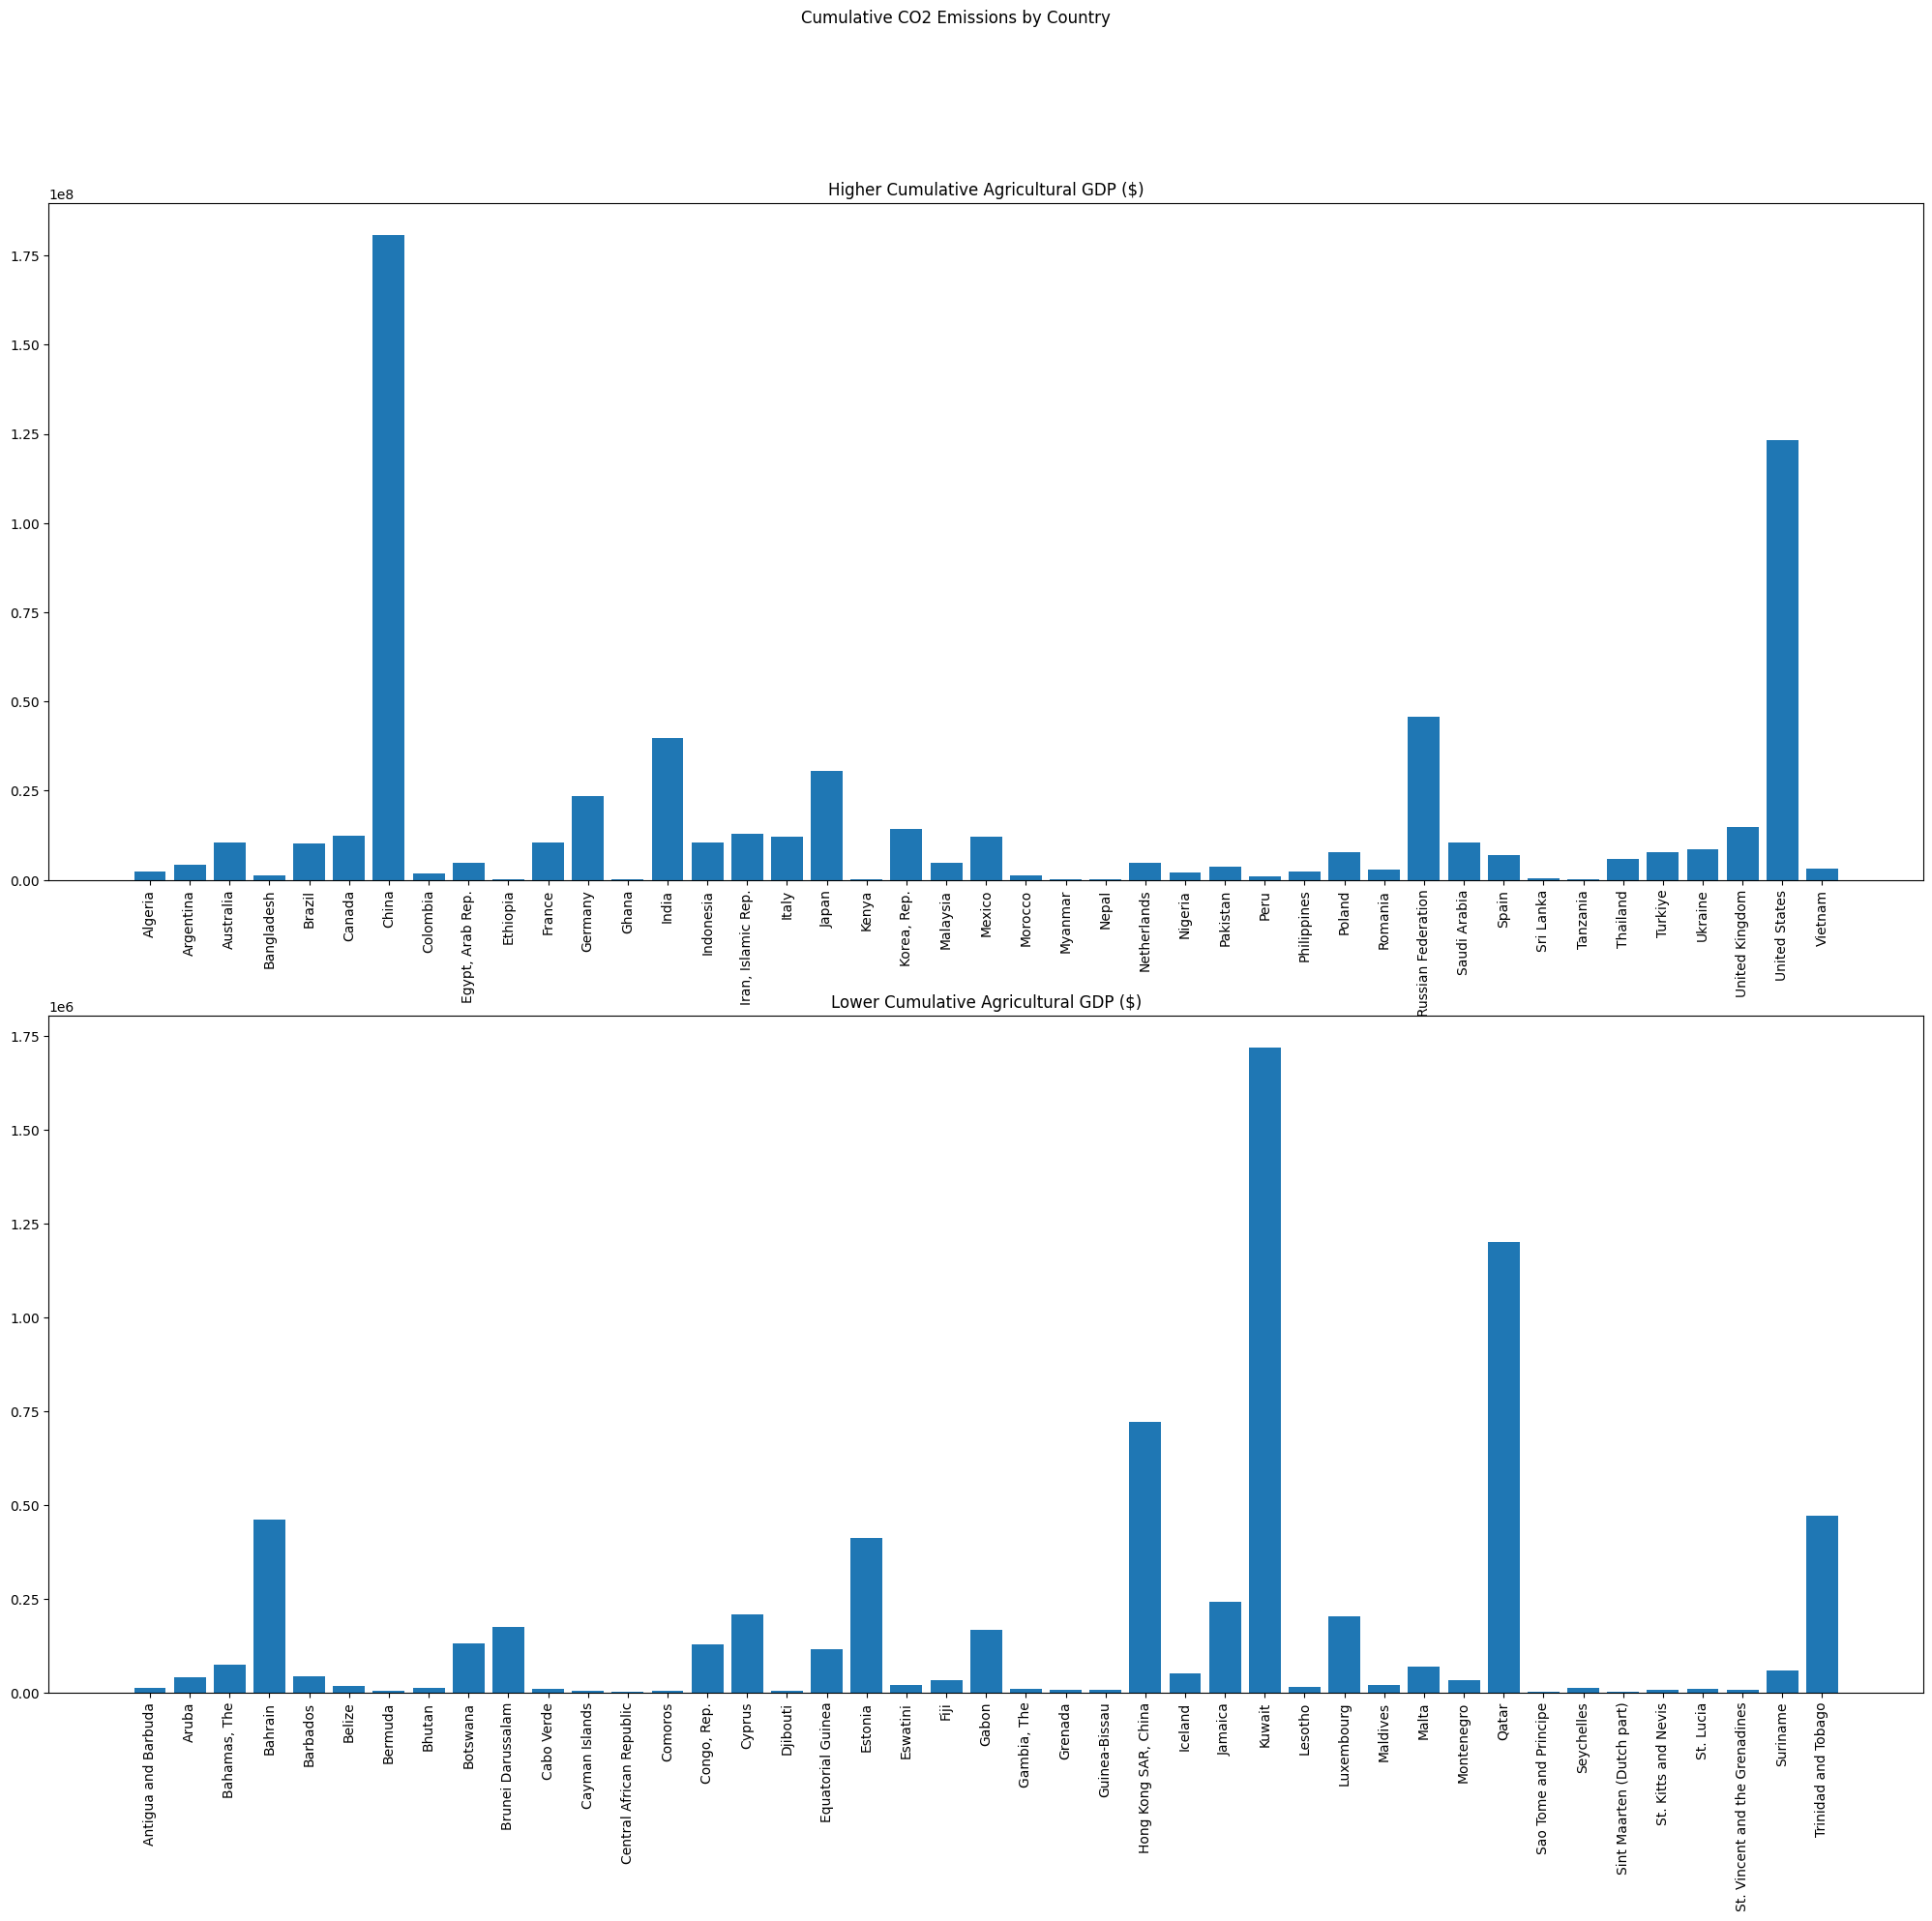

In [118]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(25,20))

fig.suptitle('Cumulative CO2 Emissions by Country')

ax1.bar(a_gdp_h.index,a_gdp_h['co2_emissions'])
ax1.set_title('Higher Cumulative Agricultural GDP ($)')
ax1.set_xticks(ax1.get_xticks())
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)

ax2.bar(a_gdp_l.index,a_gdp_l['co2_emissions'])
ax2.set_title('Lower Cumulative Agricultural GDP ($)')
ax2.set_xticks(ax2.get_xticks())
ax2.set_xticklabels(ax2.get_xticklabels(),rotation=90)

plt.show()

In [126]:
sorted = a_gdp_h.sort_values(by="ag_gdp", ascending=True)
top_ag_gdp = 

,co2_emissions,pesticide_by_tonnes,ag_percent_gdp,gdp,ag_gdp
country,,,,,
Netherlands,4.828430e+06,322930.13,68.301292,2.167392e+13,4.575412e+13
Nepal,1.364400e+05,8076.43,1017.581201,1.475418e+12,4.591004e+13
Peru,1.061540e+06,131028.31,214.708866,6.479907e+12,4.646410e+13
United Kingdom,1.482421e+07,792375.62,24.552408,6.642763e+13,5.098275e+13
Sri Lanka,3.766300e+05,48419.63,459.483030,4.405908e+12,5.361040e+13


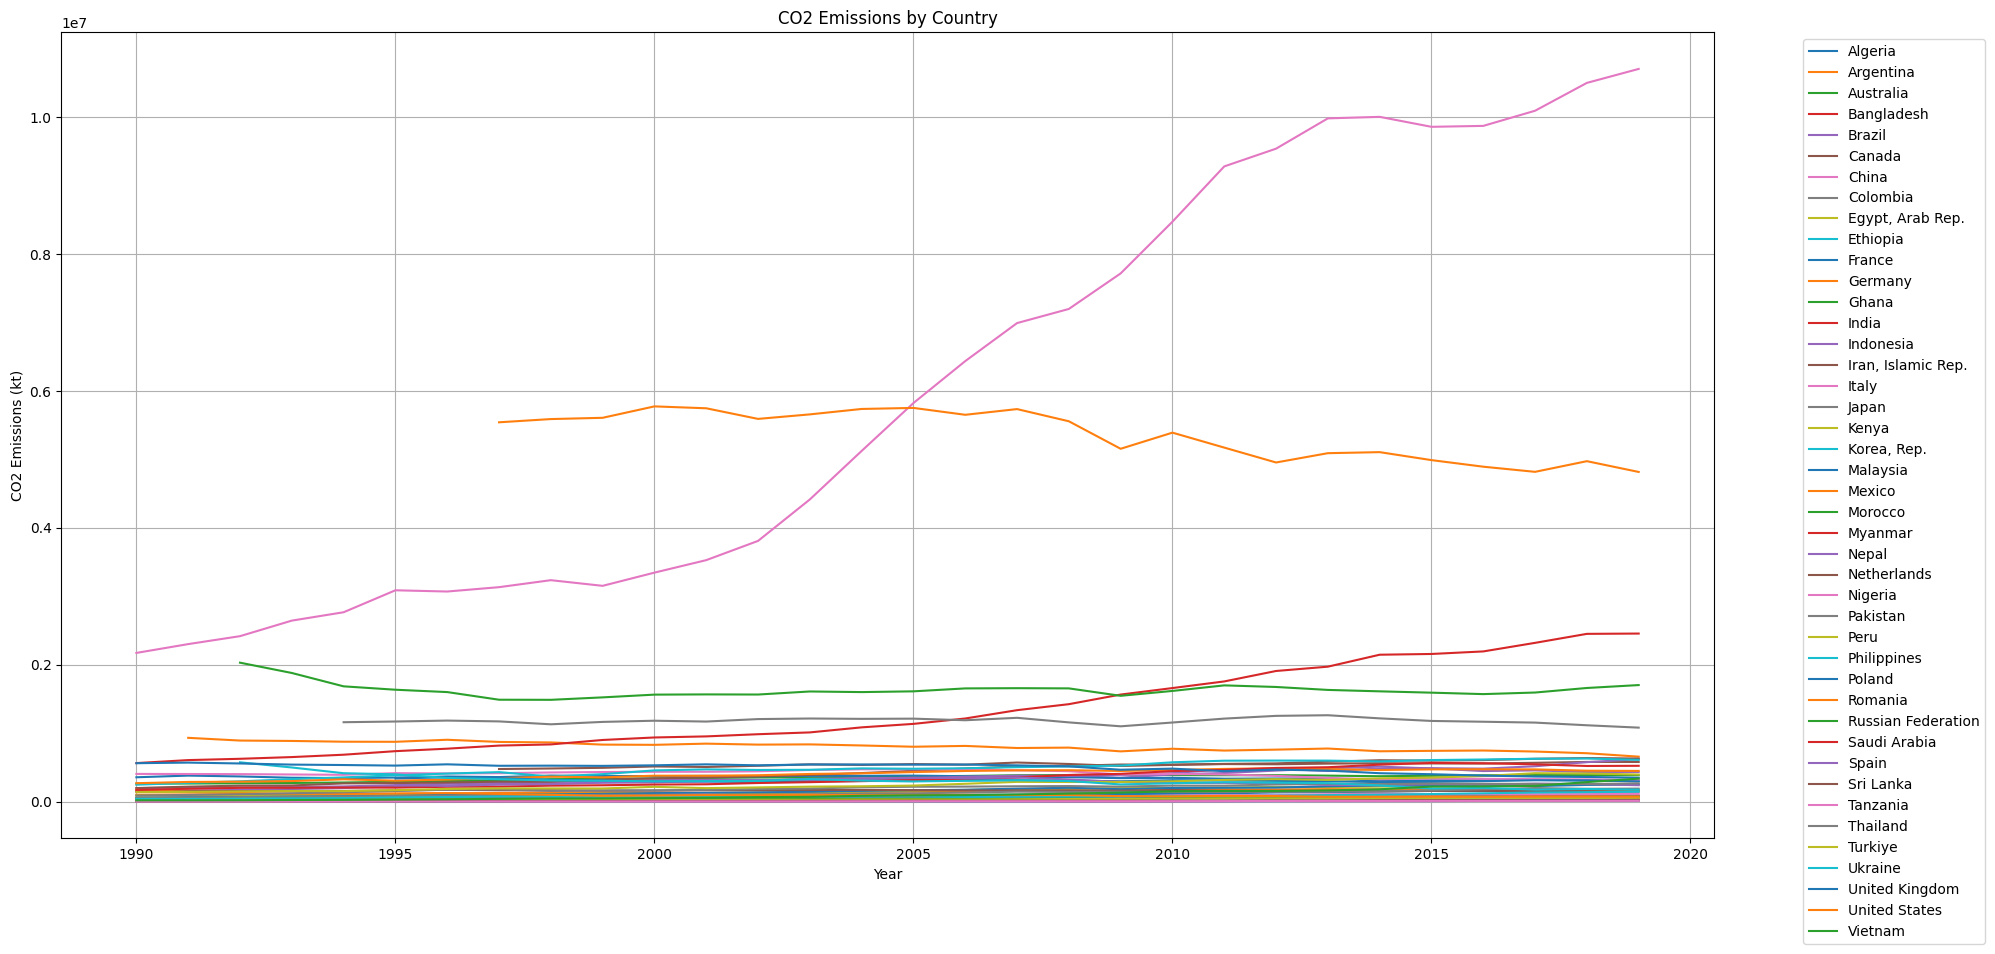

In [123]:
plt.figure(figsize=(20,10))

# higher ag_gdp ($) countries CO2 emissions YOY
for country in a_gdp_h.index:
    data = df.loc[df['country'] == country]
    plt.plot(data['year'], data['co2_emissions'])

plt.xlabel('Year')
plt.ylabel('CO2 Emissions (kt)')
plt.title('CO2 Emissions by Country')
plt.grid(True)

# Place the legend outside the plot
plt.legend(a_gdp_h.index, bbox_to_anchor=(1.05, 1), loc='upper left')
# Adjust layout to make room for the legend
plt.tight_layout()
# Show the plot
plt.show()


In [ ]:
plt.figure(figsize=(20,10))

# lower ag_gdp ($) countries CO2 emissions YOY
for country in a_gdp_l.index:
    data = df.loc[df['country'] == country]
    plt.plot(data['year'], data['co2_emissions'])

plt.xlabel('Year')
plt.ylabel('CO2 Emissions (kt)')
plt.title('CO2 Emissions by Country')
plt.grid(True)

# Place the legend outside the plot
plt.legend(a_gdp_l.index, bbox_to_anchor=(1.05, 1), loc='upper left')
# Adjust layout to make room for the legend
plt.tight_layout()
# Show the plot
plt.show()